# PROYECTO FINAL

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
import folium 
from folium import plugins

%matplotlib inline

In [12]:
delitos = pd.read_csv("C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/Todos_delitos/Todos_Delitos_CDMX_limpio.csv", encoding='latin-1')

# Exploracion 

In [ ]:
#delitos.shape

In [13]:
delitos.head()

,latitud,calle_hechos2,tipopersona,mes_hecho,mes_inicio,horainicio,competencia,coloniahechos,categoria,calidadjuridica,...,delito,alcaldiahechos,longitud,edad,ano_hecho,ano_inicio,calle_hechos,horahecho,geopoint,fechahecho
0,19.32756,CANTERA,MORAL,Diciembre,Enero,12:35:00 a. m.,FUERO COMUN,SAN JERONIMO LIDICE,DELITO DE BAJO IMPACTO,VICTIMA,...,POSESION DE VEHICULO ROBADO,LA MAGDALENA CONTRERAS,-99.23246,NaN,2018.0,2019,SAN BERNABE,22:05,"(2:19.32756,-99.23246)",31/12/2018
1,19.37453,NaN,MORAL,Diciembre,Enero,01:37:00 a. m.,FUERO COMUN,EL RETONO,ROBO A NEGOCIO CON VIOLENCIA,VICTIMA,...,ROBO A NEGOCIO CON VIOLENCIA,IZTAPALAPA,-99.12694,NaN,2018.0,2019,PORTO ALEGRE,23:21,"(2:19.37453,-99.12694)",31/12/2018
2,19.40430,NaN,MORAL,Enero,Enero,02:50:00 a. m.,FUERO COMUN,AGRICOLA PANTITLAN,DELITO DE BAJO IMPACTO,VICTIMA,...,DANO EN PROPIEDAD AJENA CULPOSA,IZTACALCO,-99.06857,NaN,2019.0,2019,CALZADA IGNACIO ZARAGOZA,01:05,"(2:19.4043,-99.06856999999999)",01/01/2019
3,19.39723,NaN,FISICA,Diciembre,Enero,02:54:00 a. m.,FUERO COMUN,AMPLIACION ESTADO DE HIDALGO,ROBO DE VEHICULO CON Y SIN VIOLENCIA,VICTIMA Y DENUNCIANTE,...,ROBO DE VEHICULO DE SERVICIO PUBLICO CON VIOLE...,ALVARO OBREGON,-99.20937,51.0,2018.0,2019,PROLONGACION ARTIFICIOS,22:20,"(2:19.39723,-99.20937000000001)",31/12/2018
4,19.36749,sauce,FISICA,Enero,Enero,03:23:00 a. m.,FUERO COMUN,GARCIMARRERO,DELITO DE BAJO IMPACTO,OFENDIDO,...,DANO EN PROPIEDAD AJENA CULPOSA POR TRANSITO V...,ALVARO OBREGON,-99.23714,NaN,2019.0,2019,AVENIDA TAMAULIPAS,02:15,"(2:19.36749,-99.23714)",01/01/2019


In [ ]:
delitos.columns

In [ ]:
delitos.info()

#Se observa que 286,644 delitos

In [ ]:
delitos.describe().T

Reacomodar las columnas

In [14]:
#Reacomoar las columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

delitos = delitos[['idcarpeta','latitud', 'longitud', 'ano_hecho', 'mes_hecho',
                   'horahecho', "categoria", "delito", "sexo", "edad", "calidadjuridica", "tipopersona", "alcaldiahechos", 
                   'coloniahechos', 'calle_hechos', 'calle_hechos2', 'competencia',  'fechahecho', "fechainicio",
                  'geopoint', 'ano_inicio', 'mes_inicio', 'horainicio']]

Verificar faltantes

In [15]:
#Verificar faltantes

delitos_incompletos = pd.DataFrame(delitos.isnull().sum()).reset_index()
#columns =  [["Variable", "Faltantes"]]
delitos_incompletos.columns = ["Variable", "Faltantes"]

delitos_incompletos["Proporcion"] = (delitos_incompletos.Faltantes/286644)*100
delitos_incompletos.sort_values(by= "Proporcion", ascending=False)

,Variable,Faltantes,Proporcion
15,calle_hechos2,181385,63.278841
9,edad,104599,36.490909
8,sexo,60482,21.100040
13,coloniahechos,10033,3.500160
2,longitud,9998,3.487950
1,latitud,9998,3.487950
19,geopoint,9998,3.487950
11,tipopersona,3082,1.075201
14,calle_hechos,597,0.208272
17,fechahecho,239,0.083379


In [ ]:
#Delitos agrupados

#delitos.groupby(["categoria", "delito"]).sum().reset_index()

# Limpiamos


In [16]:
#Tirmos variables que no nos son relevantes
delitos.drop(["calle_hechos2", "tipopersona", 'idcarpeta', 'calidadjuridica',
              'ano_inicio', 'mes_inicio','horainicio', 'fechainicio', "competencia"], axis=1, inplace=True)

In [17]:
#Después tiramos todos los NA
delitos.dropna(inplace=True)

In [18]:
#Limpiando ano_hecho
delitos.ano_hecho.unique() #hay nan

array([2018., 2019., 2016., 1983., 2017., 2012., 2010., 2015., 1998.,
       2008., 2014., 2013., 1995., 2001., 2006., 1981., 1987., 2011.,
       2002., 2007., 2009., 1999., 1972., 1992., 2004., 1986., 1996.,
       2003., 2005., 1985., 1971., 1984., 1989., 1974., 1969., 1994.,
       1968., 1975., 1997., 2020., 1991., 2000., 1990., 1982.])

In [19]:
delitos.latitud.isnull().sum()

0

In [20]:
delitos.latitud.isnull().sum()

0

In [21]:
delitos.mes_hecho.unique()
delitos.latitud.isnull().sum()

0

In [22]:
#delitos.horahecho.unique()
delitos.horahecho.isnull().sum()

0

In [23]:
delitos.categoria.unique()
#delitos.categoria.isnull().sum()

array(['ROBO DE VEHICULO CON Y SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIOLENCIA',
       'DELITO DE BAJO IMPACTO', 'HOMICIDIO DOLOSO', 'HECHO NO DELICTIVO',
       'VIOLACION', 'ROBO A NEGOCIO CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A CASA HABITACION CON VIOLENCIA',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'SECUESTRO', 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA'],
      dtype=object)

In [24]:
#delitos.delito.unique()

delitos.categoria.isnull().sum()

0

In [25]:
#Sexo

delitos.sexo.unique()
delitos = delitos[delitos["sexo"] != "No se especifica"] #tenemos 188 casos no se especifica. Los tiramos
delitos.sexo.value_counts() 

Masculino    96057
Femenino     78670
Name: sexo, dtype: int64

In [26]:
#delitos.edad.unique() #tenemos valores que no están bien como 258 y 369, los tiramos

#delitos.edad.isnull().sum()
delitos.edad.value_counts()
delitos = delitos[delitos["edad"] < 112]

In [27]:
#delitos.alcaldiahechos.unique()
delitos.alcaldiahechos.value_counts()

IZTAPALAPA                27587
CUAUHTEMOC                22416
GUSTAVO A MADERO          18748
BENITO JUAREZ             14830
ALVARO OBREGON            12617
COYOACAN                  12236
TLALPAN                   11114
MIGUEL HIDALGO            10601
VENUSTIANO CARRANZA        9651
AZCAPOTZALCO               8430
IZTACALCO                  8256
XOCHIMILCO                 5919
TLAHUAC                    4932
LA MAGDALENA CONTRERAS     3558
CUAJIMALPA DE MORELOS      2388
MILPA ALTA                 1442
Name: alcaldiahechos, dtype: int64

In [28]:
#delitos.coloniahechos.unique()

#CUIDADO, ESTO TARDA MUCHO, PERO ORDENA LA BASE DE DATOS ALFABETICAMENTE
delitos_ord = delitos.groupby(["alcaldiahechos","coloniahechos", "calle_hechos"]).sum().reset_index()
#delitos_ord

In [ ]:
#Sacamos sumatoria de delitos por calle

#delitos.calle_hechos.value_counts()

In [ ]:
#Delitos por hechos

#delitos.fechahecho.value_counts()

In [29]:
#Una vez limpias las variables hacemos un .info
delitos.info() #nos quedamos con 174,725 delitos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174725 entries, 3 to 286643
Data columns (total 14 columns):
latitud           174725 non-null float64
longitud          174725 non-null float64
ano_hecho         174725 non-null float64
mes_hecho         174725 non-null object
horahecho         174725 non-null object
categoria         174725 non-null object
delito            174725 non-null object
sexo              174725 non-null object
edad              174725 non-null float64
alcaldiahechos    174725 non-null object
coloniahechos     174725 non-null object
calle_hechos      174725 non-null object
fechahecho        174725 non-null object
geopoint          174725 non-null object
dtypes: float64(4), object(10)
memory usage: 20.0+ MB


# Recodificamos variables porque son muchas

In [ ]:
#Vamos a recodificar edad en grupos quinquenales

#delitos["edad_coded"] = np.where(delitos.edad <= 10, "0-10", "Por asignar")
#delitos["edad_coded"] = np.where((delitos.edad > 10) & (delitos.edad <= 15), "10-15", delitos.edad_coded)
#delitos["edad_coded"] = np.where((delitos.edad > 15) & (delitos.edad <= 20), "15-20", delitos.edad_coded)

#Esto funciona, pero vamos a intentar hacerlo en sólo una linea. Ejemplo de cómo hacerlo
#np.where(consumption_energy > 400, 'high', (np.where(consumption_energy < 200, 'low', 'medium'))

#Recuerda que la codificación de arriva sólo funciona renglón por renglón. Si quieres codificar todo hay que 
#hacerlo usando este chunk de código.

#delitos["edad_coded"] = np.where((delitos.edad <=10), "0-10",
#                                 (np.where((delitos.edad >10) & (delitos.edad <= 15), "11-15",
#                                           (np.where((delitos.edad >15) & (delitos.edad <= 20), "16-20",
#                                                     (np.where((delitos.edad >20) & (delitos.edad <= 25), "21-25",
#                                                               (np.where((delitos.edad >25) & (delitos.edad <= 30), "26-30",
#                                                                         (np.where((delitos.edad >30) & (delitos.edad <= 35), "31-35",
#                                                                                   (np.where((delitos.edad >35) & (delitos.edad <= 40), "36-40",
#                                                                                             (np.where((delitos.edad >40) & (delitos.edad <= 45), "41-45",
#                                                                                                       (np.where((delitos.edad >45) & (delitos.edad <= 50), "46-50",
#                                                                                                                 (np.where((delitos.edad >50) & (delitos.edad <= 55), "51-55",
#                                                                                                                           (np.where((delitos.edad >55) & (delitos.edad <= 60), "56-60",
#                                                                                                                                     (np.where((delitos.edad >60) & (delitos.edad <= 65), "61-65", #hasta aqui corre
#                                                                                                                                               (np.where((delitos.edad >65) & (delitos.edad <= 70), "65-70", 
#                                                                                                                                               (np.where(delitos.edad > 70, "70+", "otro"
#                                                                                                                                               )))))))))))))))))))))))))))
#Se verifica que no se hayan perdido valores. Deben ser 174725
#print(delitos.edad_coded.value_counts())                                                                                                                                              
#print(F'La extensión de la variable es {len(delitos.edad_coded)} observaciones') 
                                                                                                                                                                      

Codificar variable delito

In [30]:
#Codificamos la variable delitos

delitos.loc[delitos["delito"].str.contains("AMENAZAS"), "categoria"] = "AMENAZAS"
delitos.loc[delitos["delito"].str.contains("VIOLENCIA FAMILIAR"), "categoria"] = "VIOLENCIA FAMILIAR"
delitos.loc[delitos["delito"].str.contains("DANO EN PROPIEDAD AJENA"), "categoria"] = "DANO PROPIEDAD AJENA"
delitos.loc[delitos["delito"].str.contains("ABUSO DE CONFIANZA"), "categoria"] = "ABUSO DE CONFIANZA"
delitos.loc[delitos["delito"].str.contains("ENCUBRIMIENTO POR FAVORECIMIENTO Y RECEPTACION"), "categoria"] = "ENCUBRIMIENTO POR FAVORECIMIENTO Y RECEPTACION"
delitos.loc[delitos["delito"].str.contains("EXTORSION"), "categoria"] = "EXTORSION"
delitos.loc[delitos["delito"].str.contains("FALSIFICACION O ALTERACION Y USO INDEBIDO DE DOCUMENTOS"), "categoria"] = "FALSIFICACION O ALTERACION Y USO INDEBIDO DE DOCUMENTOS"
delitos.loc[delitos["delito"].str.contains("FRAUDE"), "categoria"] = "FRAUDE"
delitos.loc[delitos["delito"].str.contains("HOMICIDIO CULPOSO"), "categoria"] = "HOMICIDIO CULPOSO"
delitos.loc[delitos["delito"].str.contains("ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA"), "categoria"] = "ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA"
delitos.loc[delitos["delito"].str.contains("DESPOJO"), "categoria"] = "DESPOJO"
delitos.loc[delitos["delito"].str.contains("LESIONES CULPOSAS"), "categoria"] = "LESIONES CULPOSAS"
delitos.loc[delitos["delito"].str.contains("LESIONES INTENCIONALES"), "categoria"] = "LESIONES INTENCIONALES"
delitos.loc[delitos["delito"].str.contains("NARCOMENUDEO"), "categoria"] = "NARCOMENUDEO"
delitos.loc[delitos["delito"].str.contains("PRODUCCION, IMPRESION, ENAJENACION, DISTRIBUCION,"), "categoria"] = "IMPRESION O FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICOS"
delitos.loc[delitos["delito"].str.contains("ROBO A CASA HABITACION"), "categoria"] = "ROBO A CASA HABITACION"
delitos.loc[delitos["delito"].str.contains("ROBO A NEGOCIO"), "categoria"] = "ROBO A NEGOCIO"
delitos.loc[delitos["delito"].str.contains("ROBO A PASAJERO"), "categoria"] = "ROBO A PASAJERO"
delitos.loc[delitos["delito"].str.contains("ROBO A TRANSEUNTE"), "categoria"] = "ROBO A PASAJERO"
delitos.loc[delitos["delito"].str.contains("ROBO DE ACCESORIOS DE AUTO"), "categoria"] = "ROBO DE ACCESORIOS DE AUTO"
delitos.loc[delitos["delito"].str.contains("ROBO DE"), "categoria"] = "ROBO DE OBJETOS Y DOCUMENTOS"
delitos.loc[delitos["delito"].str.contains("ROBO DE ACCESORIOS DE AUTO"), "categoria"] = "ROBO DE ACCESORIOS DE AUTO"
delitos.loc[delitos["delito"].str.contains("USURPACION DE"), "categoria"] = "USURPACION DE IDENTIDAD"
delitos.loc[delitos["delito"].str.contains("EXTORSION"), "categoria"] = "EXTORSION Y TENTATIVA DE EXTORSION"
delitos.loc[delitos["delito"].str.contains("PERDIDA DE LA VIDA"), "categoria"] = "PERDIDA DE LA VIDA POR HECHOS NO DELICTIVOS"
delitos.loc[delitos["delito"].str.contains("ROBO A NEGOCIO CON VIOLENCIA"), "categoria"] = "ROBO A NEGOCIO"
delitos.loc[delitos["delito"].str.contains("ROBO A REPARTIDOR CON Y SIN VIOLENCIA"), "categoria"] = "ROBO A TRANSPORTISTA/REPARTIDOR"
delitos.loc[delitos["delito"].str.contains("ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA"), "categoria"] = "ROBO A TRANSPORTISTA/REPARTIDOR"

delitos["categoria"] = np.where((delitos.delito == "ABUSO SEXUAL") | (delitos.delito == "ACOSO SEXUAL")
                             ,  "ACOSO SEXUAL", delitos.categoria)



In [31]:
#Segunda ronda de simplificación
delitos.loc[delitos["delito"].str.contains("NARCOMENUDEO"), "categoria"] = "DELITO DE BAJO IMPACTO"
delitos.loc[delitos["delito"].str.contains("ROBO A TRANSPORTISTA/REPARTIDOR"), "categoria"] = "DELITO DE BAJO IMPACTO"
delitos.loc[delitos["delito"].str.contains("ENCUBRIMIENTO POR FAVORECIMIENTO Y RECEPTACION"), "categoria"] = "DELITO DE BAJO IMPACTO"
delitos.loc[delitos["delito"].str.contains("SECUESTRO"), "categoria"] = "DELITO DE BAJO IMPACTO"


In [32]:
#Tercera ronda si,plificacion
delitos.loc[delitos["delito"].str.contains("ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA"), "categoria"] = "DELITO DE BAJO IMPACTO"
delitos.loc[delitos["delito"].str.contains("ROBO A NEGOCIO CON VIOLENCIA"), "categoria"] = "ROBO A NEGOCIO"

In [33]:
delitos.categoria.unique()

array(['ROBO DE OBJETOS Y DOCUMENTOS', 'ROBO A PASAJERO',
       'DANO PROPIEDAD AJENA', 'HOMICIDIO DOLOSO',
       'ROBO A CASA HABITACION', 'HECHO NO DELICTIVO', 'VIOLACION',
       'LESIONES CULPOSAS', 'VIOLENCIA FAMILIAR',
       'LESIONES INTENCIONALES', 'FRAUDE', 'ROBO A NEGOCIO',
       'ROBO DE ACCESORIOS DE AUTO', 'AMENAZAS',
       'IMPRESION O FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICOS',
       'DESPOJO', 'EXTORSION Y TENTATIVA DE EXTORSION',
       'PERDIDA DE LA VIDA POR HECHOS NO DELICTIVOS',
       'FALSIFICACION O ALTERACION Y USO INDEBIDO DE DOCUMENTOS',
       'DELITO DE BAJO IMPACTO', 'ABUSO DE CONFIANZA',
       'USURPACION DE IDENTIDAD', 'ACOSO SEXUAL',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA',
       'HOMICIDIO CULPOSO', 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
       'ROBO A NEGOCIO CON VIOLENCIA'], dtype=object)

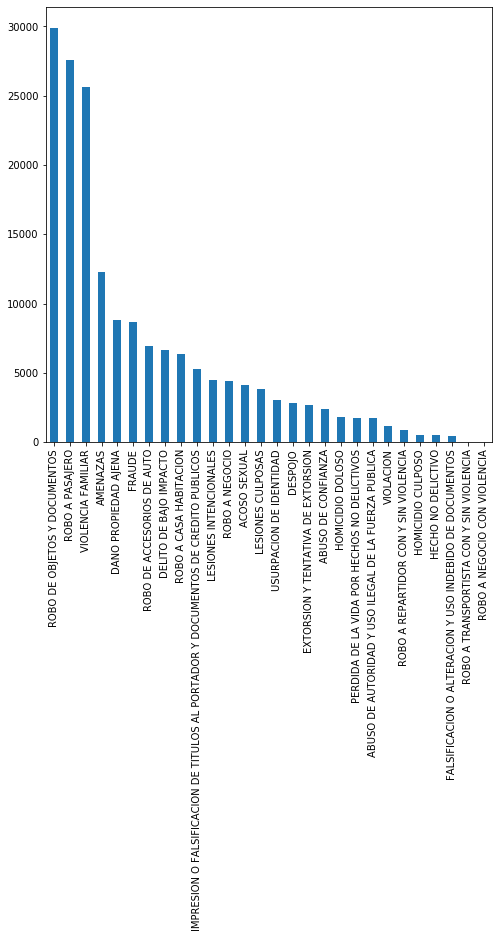

In [34]:
delitos.categoria.value_counts().plot(kind="bar", figsize=(8,8))

Finalmente, vamos a igualar la variable categoría a delito (esto porque los demás códigos ya se hicieron con delito)



In [35]:
delitos.delito = delitos.categoria

In [36]:
#Como no lo cambia, vamos a dropear ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA''ROBO A NEGOCIO CON VIOLENCIA'

delitos = delitos[delitos.categoria != "ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA"]
delitos = delitos[delitos.categoria != "ROBO A NEGOCIO CON VIOLENCIA"]

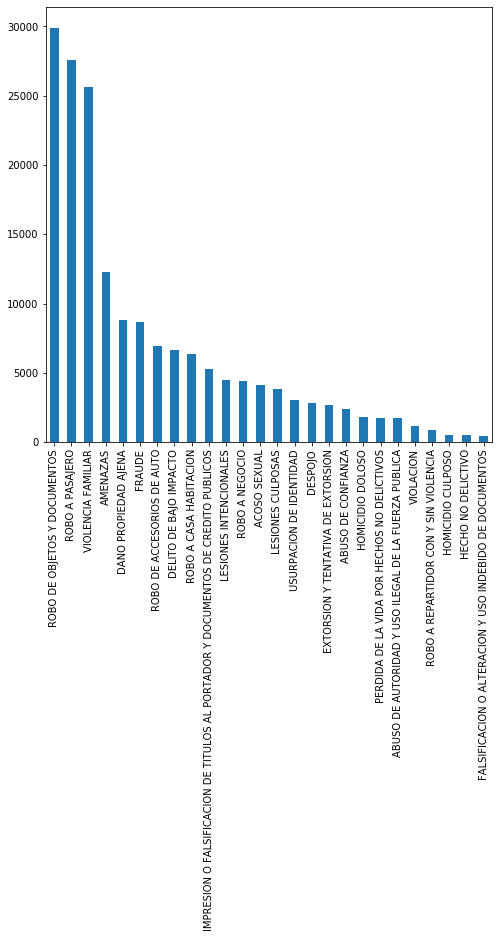

In [37]:
#Verificamos que sirva al volver a hacer el gráfico, pero esta vez con delito en lugar de categoria

delitos.delito.value_counts().plot(kind="bar", figsize=(8,8))

Trabajando con diccionarios (alternativa al np.where())

Esta parte no es relevante, pero la voy a dejar porque es una parte útil 

In [ ]:
#Vamos a crear un diccionario
#delito_dict = {'ABORTO':"Aborto", 
#               'CONTRA FUNCIONARIOS PUBLICOS':"Abuso de autoridad",
#               'DANO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL':'Daño en propiedad',
#               'DANO EN PROPIEDAD AJENA CULPOSA': 'Daño en propiedad'
#              }

#delito_dict
#delitos['prueba'] = delitos.delito.map(delito_dict)
#delitos[delitos.delito == 'DANO EN PROPIEDAD AJENA CULPOSA']

In [ ]:
#Ahora trabajaremos con los valores de delito

#Esta gráfica tarda mucho en producir
#delitos.delito.value_counts().plot(kind="bar", figsize=(40,20))

Trabajamos variable horas

In [38]:
#Trabajamos las horas en las que ocurrió el crimen. 

#Para eso creamos una nueva variable
delitos["horahecho"] = pd.to_datetime(delitos["horahecho"])

In [39]:
#Después generamos una variable de hora
delitos["hora"] = delitos.horahecho.dt.hour
delitos.hora.unique()

array([22,  0,  1,  3,  6,  7,  4, 10, 14,  5,  9, 11, 19, 18, 15, 13, 12,
       20,  8,  2, 16, 21, 17, 23], dtype=int64)

In [40]:
#Verfiicamos que esté bien
print(delitos.hora.value_counts())
print(len(delitos.hora)) #todo está bien

12    13944
15    10203
14    10196
20    10189
10     9867
13     9550
16     9543
11     9468
18     9437
19     9249
21     9131
17     8842
22     7905
9      7782
8      6835
23     6081
7      5642
6      4150
0      3484
1      3157
5      2773
2      2606
3      2462
4      2163
Name: hora, dtype: int64
174659


Finalmente, el día de la semana en la que ocurre el crimen

In [41]:
#Finalmente trabajos el día de la semana en el que pasa el crimen

#Ejemplo

#df['my_dates'] = pd.to_datetime(df['my_dates'])
#df['day_of_week'] = df['my_dates'].dt.day_name()

delitos["fechahecho"] = pd.to_datetime(delitos["fechahecho"])
delitos["dia_semana"] = delitos["fechahecho"].dt.day_name()

In [42]:
delitos.dia_semana.value_counts()

Tuesday      25878
Wednesday    25682
Friday       25670
Thursday     25188
Monday       25013
Saturday     24282
Sunday       22946
Name: dia_semana, dtype: int64

In [43]:
#Codificamos la variable día
delitos["dia_seman_cod"] = np.where((delitos.dia_semana== "Monday") | (delitos.dia_semana== "Tuesday")
                                    | (delitos.dia_semana== "Wednesday") | (delitos.dia_semana== "Thursday"),"Weekday",
                                        (np.where((delitos.dia_semana== "Friday") | (delitos.dia_semana== "Saturday")
                                         | (delitos.dia_semana== "Sunday"), "Friday-Weekend", delitos.dia_semana)))

In [44]:
delitos.dia_seman_cod.value_counts()

Weekday           101761
Friday-Weekend     72898
Name: dia_seman_cod, dtype: int64

Limpiamos la base  y la exportamos para poder hacer los mapas y las gráficas en tableau

In [ ]:
delitos.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/Delitos_limpio_tableau2.csv')

Tiramos las variables que no nos sirven

In [45]:
delitos.columns

Index(['latitud', 'longitud', 'ano_hecho', 'mes_hecho', 'horahecho',
       'categoria', 'delito', 'sexo', 'edad', 'alcaldiahechos',
       'coloniahechos', 'calle_hechos', 'fechahecho', 'geopoint', 'hora',
       'dia_semana', 'dia_seman_cod'],
      dtype='object')

In [46]:
#Finalmente tiramos las variables que ya no nos sirven
delitos.drop(["horahecho", "categoria", "fechahecho", "geopoint", "calle_hechos", "coloniahechos"], 
             axis=1, inplace=True)  # PRUEBA recuerda que tiene que ponersele "edad" si no mejoró

In [ ]:
#Tiramos otras variables que no nos sirven tanto
#delitos.drop(["coloniahechos"], 
#             axis=1, inplace=True)

In [47]:
#Nuestra base final luce así
delitos.columns

Index(['latitud', 'longitud', 'ano_hecho', 'mes_hecho', 'delito', 'sexo',
       'edad', 'alcaldiahechos', 'hora', 'dia_semana', 'dia_seman_cod'],
      dtype='object')

Hacemos el one-hot encoding de las variables delito, sexo, dia_semana, mes_hecho, alcaldiahechos

In [ ]:
#Por el momento no hay que correr esto porque el ONE HOT lo haces en la definición del modelo
#delitos_copy= pd.get_dummies(data=delitos,columns=['delito', "sexo", "dia_semana", "mes_hecho", "alcaldiahechos",
#                                                   "edad_coded"])  #,drop_first=True lo quitamos, porque me quita una var
#delitos_copy.columns

# Verificamos correlaciones

In [ ]:
corr_matrix = delitos_copy.corr().unstack() #Creamos la matri y la volvemos lista
sorted_matrix = corr_matrix.sort_values(kind="quicksort", ascending=False) #la ordenamos
#print(sorted_matrix.head(100)) #se observa que a partir de los pares iguales la corr mas alta es de 0.5. No hay.
#print(sorted_matrix.tail(100)) #me preocupa que hay -1.0 correlación

# Creamos el modelo de randomforest

Definimos nuestro target, que es la variable delito

In [48]:
# 1) delitos_y = delitos.delito

#2) #Nuestra y va a ser el delito dummiado
#delitos_y = pd.get_dummies(delitos.delito, drop_first = True)

# 3) metemos como target delitos_y
delitos_y = delitos.delito

In [49]:
len(delitos_y)

174659

In [50]:
delitos_y.value_counts()

ROBO DE OBJETOS Y DOCUMENTOS                                                         29899
ROBO A PASAJERO                                                                      27615
VIOLENCIA FAMILIAR                                                                   25667
AMENAZAS                                                                             12245
DANO PROPIEDAD AJENA                                                                  8775
FRAUDE                                                                                8655
ROBO DE ACCESORIOS DE AUTO                                                            6927
DELITO DE BAJO IMPACTO                                                                6669
ROBO A CASA HABITACION                                                                6361
IMPRESION O FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICOS     5246
LESIONES INTENCIONALES                                                                4499

Definimos todos los features

In [132]:
# 1) delitos_copy

# 2) Nuestras features x van a ser el resto
#delitos_x = pd.get_dummies(delitos, columns = ["sexo", "dia_semana", "mes_hecho", "alcaldiahechos",
#                                                   "edad_coded"], drop_first=True)


#delitos_x["latitud"] = delitos.latitud
#delitos_x["longitud"] = delitos.longitud
#delitos_x["ano_hecho"] = delitos.ano_hecho
#delitos_x["hora"] = delitos.hora

# 3) Las features serán las mismas que en el pasado (la diferencia está en el target)

delitos_x = pd.get_dummies(delitos, columns = ["mes_hecho", "alcaldiahechos", "dia_semana"]) 
                                            # PRUEBA recuerda aquí agregar edad_coded si no sirve;
                                            #  también ponemos "dia_semana".
                                               #Sin drop_first=True


#delitos_x["latitud"] = delitos.latitud
#delitos_x["longitud"] = delitos.longitud
#delitos_x["ano_hecho"] = delitos.ano_hecho
#delitos_x["hora"] = delitos.hora
#delitos_x["edad"] = delitos.edad


In [133]:
#ESTO SI NO FUNCIONA REGRESAS A LA ANTERIOR LA VARIABLE "SEXO"
delitos_x = pd.get_dummies(delitos_x, columns = ["sexo"], drop_first=True) 


In [134]:
#Aqui verificas y tiras lo que no quieres

delitos_x.drop(["delito", "dia_seman_cod"], axis=1, inplace=True) #aqui dropeas según quieras incluir o no

In [135]:
delitos_x.head(3)

,latitud,longitud,ano_hecho,edad,hora,mes_hecho_Abril,mes_hecho_Agosto,mes_hecho_Diciembre,mes_hecho_Enero,mes_hecho_Febrero,mes_hecho_Julio,mes_hecho_Junio,mes_hecho_Marzo,mes_hecho_Mayo,mes_hecho_Noviembre,mes_hecho_Octubre,mes_hecho_Septiembre,alcaldiahechos_ALVARO OBREGON,alcaldiahechos_AZCAPOTZALCO,alcaldiahechos_BENITO JUAREZ,alcaldiahechos_COYOACAN,alcaldiahechos_CUAJIMALPA DE MORELOS,alcaldiahechos_CUAUHTEMOC,alcaldiahechos_GUSTAVO A MADERO,alcaldiahechos_IZTACALCO,alcaldiahechos_IZTAPALAPA,alcaldiahechos_LA MAGDALENA CONTRERAS,alcaldiahechos_MIGUEL HIDALGO,alcaldiahechos_MILPA ALTA,alcaldiahechos_TLAHUAC,alcaldiahechos_TLALPAN,alcaldiahechos_VENUSTIANO CARRANZA,alcaldiahechos_XOCHIMILCO,dia_semana_Friday,dia_semana_Monday,dia_semana_Saturday,dia_semana_Sunday,dia_semana_Thursday,dia_semana_Tuesday,dia_semana_Wednesday,sexo_Masculino
3,19.39723,-99.20937,2018.0,51.0,22,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5,19.30415,-99.26722,2019.0,45.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,19.23199,-99.16634,2019.0,42.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [136]:
#Convertimos en array

#Use numpy to convert to arrays

# Labels are the values we want to predict (nuestro y) #delitos_y_labels = delitos_y.columns

delitos_y = np.array(delitos['delito'])

delitos_x_list = list(delitos_x.columns) #guarda los nombres para despupes
delitos_x = np.array(delitos_x) #los convierte en array



#features= features.drop('actual', axis = 1)# Saving feature names for later use
#feature_list = list(features.columns)# Convert to numpy array
#features = np.array(features)

Dividimos nuestra base de datos para entrenar el modelo

In [77]:
from sklearn.model_selection import train_test_split

In [137]:
#Separamos el modelo

# 1) X_train, X_test, y_train, y_test = train_test_split(delitos_copy, delitos_y, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(delitos_x, delitos_y, test_size=0.2)

Definimos el modelo

In [79]:
#Importamos el randomforest

from sklearn.ensemble import RandomForestClassifier

In [ ]:
#help(RandomForestClassifier)

In [138]:
#Entrenamos el modelo
ks_rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train) #entrenamos el modelo con los dos train

In [139]:
#Una vez entrenado el modelo, lo que hacemos es que lo probamos con el test (predecimos y, con el X_test)
y_pred_test_randomforest = ks_rf.predict(X_test)

In [82]:
#clases calculadas
y_pred_test_randomforest

array(['ROBO A PASAJERO', 'ROBO A PASAJERO',
       'ROBO DE OBJETOS Y DOCUMENTOS', ..., 'ROBO A PASAJERO',
       'LESIONES CULPOSAS', 'ROBO DE OBJETOS Y DOCUMENTOS'], dtype=object)

In [140]:
#Calculamos proba
y_pred_test_randomforest_prob = ks_rf.predict_proba(X_test)

In [84]:
print(len(y_pred_test_randomforest_prob[2]))

#Te da una probabilidad por cada categoría en y

26


In [ ]:
#Proba calculada

#np.set_printoptions(threshold=np.inf)
#y_pred_test_randomforest_prob

In [85]:
#Obtenemos el la matriz de confusion
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred_test_randomforest)

In [141]:
#Obtener el score pra probar el fitting del modelo
from sklearn.metrics import f1_score

In [142]:
f1_score(y_test, y_pred_test_randomforest , average='weighted') 

#En la primera prueba hay overfitting
#En la segunda prueba no hay overfittin

0.23317377176617088

In [ ]:
#Hacemos la roc curve

#from sklearn import metrics
#y_pred_proba = ks_rf.predict_proba(X_test)[::,1] 
#fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
#plt.plot(fpr,tpr)

# Naive bayes

In [ ]:
#from sklearn.naive_bayes import GaussianNB

In [ ]:
#nb = GaussianNB()  #creamos modelos
#fitnb = nb.fit(X_train, y_train) #Lo entrenamos

In [ ]:
#predictionsnb = fitnb.predict(y_test) #le pasamos el test
#y_pred = fitnb.predict(X_test) #se hace con el test o con el train



#Esto no, es ejemplo
#gnb = GaussianNB()
#y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)

In [ ]:
#y_pred

In [ ]:
#from sklearn.metrics import accuracy_score
#print('NB Accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
#from sklearn import metrics

#y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
#metrics.confusion_matrix(y_test, y_pred)

# CLUSTERIZACIÓN. K-NEAREST NEIGHBOURS

In [104]:
#Vamos a utilizar un model de k-nearest neighbours 
from sklearn.neighbors import KNeighborsClassifier

In [143]:
#Entrenamos el clasificador

neighbor_model = KNeighborsClassifier(n_neighbors=5) #Hacemos cinco clusters 
neighbor_model.fit(X_train, y_train) #entrenando

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#delitos_x_list

In [146]:
#obs = np.array([[19.39723,-99.20937,2018.0,51.0,22,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1]])
#obs2 =np.array([[19.39723,-99.20937,2018.0,51.0,22,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1]])

obs3 = np.array([[19.39723,-99.20937,2018.0,51.0,22,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1]])

print(neighbor_model.predict(obs3))

['VIOLENCIA FAMILIAR']


# Haciendo la función

In [ ]:
#Ejemplo básico de cómo hacer un diccionario
#dictionary = {alcaldia:[], edad: 0}
#dictionary[alcaldia]

In [ ]:
#Ejemplo de cómo hacer un for

#lista = ["miguel hidalgo", "benito juarez", "roma"]
#alcaldia_input = "benito juarez"

#for i in lista:
#    if i == alcaldia_input:
#        dictionary[alcaldia].append(1)
#    else:
#        dictionary[alcaldia].append(0)
        
#dictionary[alcaldia]

In [ ]:
#Ejemplo

#input2 = "ALVARO_OBREGON"
#obs=[]
#for i in alcaldia_dic.keys():
#    if input2 == i:
        #print(alcaldia_dic[i])
#        obs.append(alcaldia_dic[i][0])
#        obs.append(alcaldia_dic[i][1])
#obs.append(int(edad))

#obs

In [ ]:
#lista = []
#for i in alcaldia_dic.values():
#    lista.append(i)

In [88]:
#Longitud, latitud
ALVARO_OBREGON = [19.4204498,-99.1566863]
AZCAPOTZALCO = [19.4858628,-99.2171046]
BENITO_JUAREZ = [19.38053,-99.1790513]
COYOACAN = [19.3282802,-99.1874339]
CUAJIMALPA = [19.359444,-99.3043521]
CUAUHTEMOC = [19.4328036,-99.1882921]
GUSTAVO_MADERO = [19.5189221,-99.183998]
IZTACALCO = [19.3990446,-99.1315041]
IZTAPALAPA = [19.3429944,-99.1202121]
MAGDALENA_CONTRERAS = [19.2756199,-99.3350277]
MIGUEL_HIDALGO = [19.4297359,-99.2467061]
MILPA_ALTA = [19.1939056,-99.0421193]
TLAHUAC = [19.269001,-99.0746758]
TLALPAN = [19.2010919,-99.348678]
VENUSTIANO_CARRANZA = [19.432134,-99.1223489]
XOCHIMILCO = [19.2366455,-99.1507608]

In [159]:
#Definimos un diccionario
alcaldia_dic= {"ALVARO_OBREGON": [19.4204498,-99.1566863], "AZCAPOTZALCO": [19.4858628,-99.2171046],
               "BENITO_JUAREZ": [19.38053,-99.1790513],
            "COYOACAN": [19.3282802,-99.1874339], "CUAJIMALPA": [19.3282802,-99.1874339],
               "CUAUHTEMOC": [19.4328036,-99.1882921],
            "GUSTAVO_MADERO": [19.5189221,-99.183998], "IZTACALCO": [19.3990446,-99.1315041],
            "IZTAPALAPA": [19.3429944,-99.1202121], "MAGDALENA_CONTRERAS": [19.2756199,-99.3350277],
            "MIGUEL_HIDALGO": [19.4297359,-99.2467061], "MILPA_ALTA": [19.1939056,-99.0421193],
            "TLAHUAC": [19.269001,-99.0746758], "TLALPAN": [19.2010919,-99.348678],
            "VENUSTIANO_CARRANZA": [19.432134,-99.1223489], "XOCHIMILCO": [19.2366455,-99.1507608]}

In [161]:
#TENEMOS QUE HACER UNA LISTA PARA CADA VARIABLE QUE TIENE VARIOS VALORES
#TENEMOS QUE HACER UN DICT LARGO
#DEFINIMOS INPUT
#lO PONEMOS EN LA FUNCIÓN

dict_user = {"alcaldia_CDMX":["ALVARO_OBREGON", "AZCAPOTZALCO", "BENITO_JUAREZ", "COYOACAN", "CUAJIMALPA", "CUAUHTEMOC",
                       "GUSTAVO_MADERO", "IZTACALCO", "IZTAPALAPA", "MAGDALENA_CONTRERAS",
                       "MIGUEL_HIDALGO", "MILPA_ALTA", "TLAHUAC", "TLALPAN", "VENUSTIANO_CARRANZA", "XOCHIMILCO"],
             "latitud": [19.4204498, 19.4858628, 19.38053, 19.3282802, 19.359444, 19.4328036, 19.5189221, 19.3990446, 
                         19.3429944, 19.2756199, 19.4297359, 19.1939056, 19.269001, 19.2010919, 19.432134, 19.2366455],
             "longitud": [-99.1566863, -99.2171046, -99.1790513,-99.1874339, -99.3043521, -99.1882921,-99.183998, 
                          -99.1315041,-99.1202121, -99.3350277, -99.2467061, -99.0421193, -99.0746758, -99.348678, 
                          -99.1223489,-99.1507608],
            "mes":["ENERO", "FEBRERO", "MARZO", "ABRIL", "MAYO", "JUNIO", "JULIO", "AGOSTO", "SEPTIEMBRE", "OCTUBRE",
                 "NOVIEMBRE","DICIEMBRE"],
            "dia_semana":["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"],
            "sexo": ["MASCULINO", "FEMENINO"],
            "edad":0,
            "ano":0}

LISTA_ALCALDIAS = ["ALVARO_OBREGON", "AZCAPOTZALCO", "BENITO_JUAREZ", "COYOACAN", "CUAJIMALPA", "CUAUHTEMOC",
                       "GUSTAVO_MADERO", "IZTACALCO", "IZTAPALAPA", "MAGDALENA_CONTRERAS",
                       "MIGUEL_HIDALGO", "MILPA_ALTA", "TLAHUAC", "TLALPAN", "VENUSTIANO_CARRANZA", "XOCHIMILCO"]
LISTA_LATITUD = [19.4204498, 19.4858628, 19.38053, 19.3282802, 19.359444, 19.4328036, 19.5189221, 19.3990446, 
                         19.3429944, 19.2756199, 19.4297359, 19.1939056, 19.269001, 19.2010919, 19.432134, 19.2366455]
LISTA_LONGITUD =  [-99.1566863, -99.2171046, -99.1790513,-99.1874339, -99.3043521, -99.1882921,-99.183998, 
                          -99.1315041,-99.1202121, -99.3350277, -99.2467061, -99.0421193, -99.0746758, -99.348678, 
                          -99.1223489,-99.1507608]
LISTA_MES = ["ENERO", "FEBRERO", "MARZO", "ABRIL", "MAYO", "JUNIO", "JULIO", "AGOSTO", "SEPTIEMBRE", "OCTUBRE",
                 "NOVIEMBRE","DICIEMBRE"]
LISTA_DIASEMANA = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
LISTA_SEXO = ["MASCULINO", "FEMENINO"]


In [91]:
dict_user["alcaldia_CDMX"]

['ALVARO_OBREGON',
 'AZCAPOTZALCO',
 'BENITO_JUAREZ',
 'COYOACAN',
 'CUAJIMALPA',
 'GUSTAVO_MADERO',
 'IZTACALCO',
 'IZTAPALAPA',
 'MAGDALENA_CONTRERAS',
 'MIGUEL_HIDALGO',
 'MILPA_ALTA',
 'TLAHUAC',
 'TLALPAN',
 'VENUSTIANO_CARRANZA',
 'XOCHIMILCO']

Iniciamos el loop

In [ ]:
#Para buscar el index (i) y e (element)

#for i,e in enumerate(LISTA_ALCALDIAS):
#    print(i,e)
#    print(i)

In [162]:
#Definimos la variable user_input
user_input = []

#Definimos teoréticamente los inputs. Estas variables se irán cuando las reemplacemos con el input real
alcaldia_input = "ALVARO_OBREGON"
ano_input = 2020
edad_input = 27
sexo_input = 1
mes_input = "SEPTIEMBRE"
diasemana_input = "MONDAY"
hora_input = 9

#Iniciamos el loop

#loop para meter latitud y longitud
for i,e in enumerate(LISTA_ALCALDIAS):
    if e== alcaldia_input:
        user_input.append(dict_user["latitud"][i])
        #print(user_input)
    if e== alcaldia_input:
        user_input.append(dict_user["longitud"][i])
        #print(user_input)

#Metemos variables que no necesitan for
user_input.append(int(ano_input))
user_input.append(int(edad_input))
user_input.append(int(hora_input))

#Hacemos un loop para decidir el mes
for e in LISTA_MES:
    if e == mes_input:
        user_input.append(1)
    else:
        user_input.append(0)


#Hacemos un loop para decidir la alcaldia
for e in LISTA_ALCALDIAS:
    if e== alcaldia_input:
        user_input.append(1)
    else:
        user_input.append(0)
        #print(lista_prueba)
        
#Hacemos un loop para dia de la semana
for e in LISTA_DIASEMANA:
    if e== diasemana_input:
        user_input.append(1)
    else:
        user_input.append(0)
        
#Metemos la última variable que no necesita for
user_input.append(int(sexo_input))


print(user_input)


[19.4204498, -99.1566863, 2020, 27, 9, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [164]:
#deito_x prueba
a =np.array([[19.39723,-99.20937,2018.0,51.0,22,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1]])

#Funcion resultado
b = np.array([[19.4204498, -99.1566863, 2020, 27, 9, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

alist =a.tolist()
blist = b.tolist()

print(len(alist[0]))
print(len(blist[0]))

41
41


In [198]:
def usuario_input(alcaldia_input, ano_input, edad_input, hora_input, mes_input, diasemana_input, sexo_input):

#Iniciamos el loop
    user_input = []
#loop para meter latitud y longitud
    for i,e in enumerate(LISTA_ALCALDIAS):
        if e== alcaldia_input:
            user_input.append(dict_user["latitud"][i])
            #print(user_input)
        if e== alcaldia_input:
            user_input.append(dict_user["longitud"][i])
            #print(user_input)

#Metemos variables que no necesitan for
    user_input.append(int(ano_input))
    user_input.append(int(edad_input))
    user_input.append(int(hora_input))

#Hacemos un loop para decidir el mes
    for e in LISTA_MES:
        if e == mes_input:
            user_input.append(1)
        else:
            user_input.append(0)


#Hacemos un loop para decidir la alcaldia
    for e in LISTA_ALCALDIAS:
        if e== alcaldia_input:
            user_input.append(1)
        else:
            user_input.append(0)
            #print(lista_prueba)
        
#Hacemos un loop para dia de la semana
    for e in LISTA_DIASEMANA:
        if e== diasemana_input:
            user_input.append(1)
        else:
            user_input.append(0)
            
#Metemos la última variable que no necesitan for    
    user_input.append(int(sexo_input))
    #print(user_input)
    
    return np.array([user_input])

Inputs

In [96]:
#Empezamos a definir inputs

#alcaldia_input
alcaldia_input = input(f'¿A qué alcaldia vas? Escribe el nombre de la alcaldia tal como aparece en la lista siguiente: \n {LISTA_ALCALDIAS} \n \n')

¿A qué alcaldia vas? Escribe el nombre de la alcaldia tal como aparece en la lista siguiente: 
 ['ALVARO_OBREGON', 'AZCAPOTZALCO', 'BENITO_JUAREZ', 'COYOACAN', 'CUAJIMALPA', 'GUSTAVO_MADERO', 'IZTACALCO', 'IZTAPALAPA', 'MAGDALENA_CONTRERAS', 'MIGUEL_HIDALGO', 'MILPA_ALTA', 'TLAHUAC', 'TLALPAN', 'VENUSTIANO_CARRANZA', 'XOCHIMILCO'] 
 
MIGUEL_HIDALGO


In [97]:
#ano_input
ano_input = input("¿En qué año piensas ir?: \n \n")

¿En qué año piensas ir?: 
 
2020


In [98]:
#Edad
edad_input = input("¿Cuál es tu edad?  \n \n")

¿Cuál es tu edad?  
 
26


In [173]:
#sexo
sexo_input = input("¿Te identificas como hombre? Escribe 1 si así es, 0 si no es así \n \n  ")

¿Te identificas como hombre? Escribe 1 si así es, 0 si no es así 
 
  1


In [100]:
#Mes
mes = input(f'¿En qué mes planeas ir? Por favor, escribe el mes exactamente como aparece en la lista: \n {LISTA_MES} \n \n')

¿En qué mes planeas ir? Por favor, escribe el mes exactamente como aparece en la lista: 
 ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'] 
 
MARZO


In [10]:
#Dia
dia = input(f'¿En qué día vas a ir? Por favor, escribe el día como se pone a cotinuación (en inglés porque vamos a practicar la primaria): \n {LISTA_DIASEMANA} \n \n')

¿En qué día vas a ir? Por favor, escribe el día como se pone a cotinuación (en inglés porque vamos a practicar la primaria): 
 ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'] 
 
MONDAY


Llamamos a la función ya con los inputs cargados

In [199]:
resultado =usuario_input(alcaldia_input, ano_input, edad_input, hora_input, mes_input, diasemana_input, sexo_input)
#neighbor_model.predict(resultado)
resultado

array([[ 1.94204498e+01, -9.91566863e+01,  2.02000000e+03,
         2.70000000e+01,  9.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00]])

#Resultado Final

In [200]:
neighbor_model.predict(resultado)

array(['DELITO DE BAJO IMPACTO'], dtype=object)

# Hacer el mapa

In [ ]:
#Mapa de México
mapa_mx=folium.Map(location=[23.1647882, -98.5497951], tiles='openstreetmap', zoom_start=4.92)

#Mapa de CDMX
#19.395923,-99.1530584,10.78
mapa=folium.Map(location=[19.395923, -99.1530584], tiles="stamentoner", zoom_start=10.78)
#folium.TileLayer('stamentoner').add_to(mapa)

In [ ]:
#Listas de eventos delicitivos
# 
lat=list(delitos.latitud)
lng=list(delitos.longitud)
names=list(delitos['delito']) #para mostrar en el popup
#acres=list(parks.Acres)

In [ ]:
#Este ciclo crea los marcadores con forma de gotita en cada coordenada geográfica
for i in range(len(lat)):
    folium.Marker([float(lat[i]), float(lng[i])],icon=folium.Icon(color='green'),popup=names[i] ,fill_color="#3db7e4").add_to(mapa)

In [ ]:
#mapa.save('mex.html')

In [ ]:
#display(mapa)

Mapa más pequeño

In [ ]:
#Hacer mapa más pequeño 
mapa_2017 = folium.Map(location=[19.395923, -99.1530584], tiles="stamentoner", zoom_start=10.78)

In [ ]:
lat = delitos.loc[delitos["ano_hecho"]== 2017, ["latitud"]]
lat = lat['latitud'].tolist()

In [ ]:
lng= delitos.loc[delitos["ano_hecho"]== 2017, ["longitud"]]
lng = lng["longitud"].tolist()

In [ ]:
names=list(delitos['delito'])

In [ ]:
for i in range(len(lat)):
    folium.Marker([float(lat[i]), float(lng[i])],icon=folium.Icon(color='red'),popup=names[i] ,fill_color="#3db7e4").add_to(mapa_2017)

In [ ]:
#mapa_2017.save('mex.html')

In [ ]:
#display(mapa_2017)

In [ ]:
#Mapa de un delito
mapa_acoso = folium.Map(location=[19.395923, -99.1530584], tiles="stamentoner", zoom_start=10.78)

In [ ]:
lat = delitos.loc[delitos["delito"]== "ACOSO SEXUAL", ["latitud"]]
lat = lat['latitud'].tolist()

In [ ]:
lng= delitos.loc[delitos["delito"]== "ACOSO SEXUAL", ["longitud"]]
lng = lng["longitud"].tolist()

In [ ]:
names=list(delitos['delito'])

In [ ]:
for i in range(len(lat)):
    folium.Marker([float(lat[i]), float(lng[i])],icon=folium.Icon(color='red'),popup=names[i] ,fill_color="#3db7e4").add_to(mapa_acoso)

In [ ]:
mapa_acoso.save('mex.html')

In [ ]:
#display(mapa_acoso)

# Mapa de calor

In [ ]:
mapa_calor = folium.Map(location=[19.395923, -99.1530584], tiles="openstreetmap", zoom_start=10.78)

In [ ]:
# convert to (n, 2) nd-array format for heatmap
stationArr = delitos[['latitud', 'longitud']].as_matrix()

In [ ]:
# plot heatmap
mapa_calor.add_children(plugins.HeatMap(stationArr, radius=15))

In [ ]:
#Hacemos mapa de un tipo de delito

#Partimos el dataframe
robo_objetos = delitos[delitos.delito =="ROBO DE OBJETOS Y DOCUMENTOS"]

#Creamos el mapa con coordenadas
mapa_calor_roboobjetos = folium.Map(location=[19.395923, -99.1530584], tiles="openstreetmap", zoom_start=10.78)

#Creamos matriz del robo específico
delitos_robo = robo_objetos[['latitud', 'longitud']].as_matrix()

#Agregamos la capa
mapa_calor_roboobjetos.add_children(plugins.HeatMap(delitos_robo, radius=15))

#Guardamos
mapa_calor_roboobjetos.save('mapacalor_robo_objetos.html')
mapa_calor_roboobjetos

In [ ]:
#Hacemos mapa de un tipo de delito

#Partimos el dataframe
robo_pasajero = delitos[delitos.delito =="ROBO A PASAJERO"]

#Creamos el mapa con coordenadas
mapa_calor_robopasajero = folium.Map(location=[19.395923, -99.1530584], tiles="openstreetmap", zoom_start=10.78)

#Creamos matriz del robo específico
delitos_robopasajero = robo_pasajero[['latitud', 'longitud']].as_matrix()

#Agregamos la capa
mapa_calor_robopasajero.add_children(plugins.HeatMap(delitos_robopasajero, radius=15))

#Guardamos
mapa_calor_robopasajero.save('mapacalor_robopasajero.html')
mapa_calor_robopasajero

In [ ]:
#Hacemos mapa de un tipo de delito

#Partimos el dataframe
violencia_familiar = delitos[delitos.delito =="VIOLENCIA FAMILIAR"]

#Creamos el mapa con coordenadas
mapa_calor_violenciafam = folium.Map(location=[19.395923, -99.1530584], tiles="openstreetmap", zoom_start=10.78)

#Creamos matriz del robo específico
delitos_violenciafam = violencia_familiar[['latitud', 'longitud']].as_matrix()

#Agregamos la capa
mapa_calor_violenciafam.add_children(plugins.HeatMap(delitos_violenciafam, radius=15))

#Guardamos
mapa_calor_violenciafam.save('mapacalor_violenciafam.html')
mapa_calor_violenciafam

In [ ]:
#Hacemos mapa de un tipo de delito

#Partimos el dataframe
delitos_acoso = delitos[delitos.delito =="ACOSO SEXUAL"]

#Creamos el mapa con coordenadas
mapa_calor_acoso = folium.Map(location=[19.395923, -99.1530584], tiles="openstreetmap", zoom_start=10.78)

#Creamos matriz del robo específico
delitos_delitoacoso = delitos_acoso[['latitud', 'longitud']].as_matrix()

#Agregamos la capa
mapa_calor_acoso.add_children(plugins.HeatMap(delitos_delitoacoso, radius=15))

#Guardamos
mapa_calor_acoso.save('mapacalor_acoso.html')
mapa_calor_acoso

In [ ]:
#Hacemos mapa de un tipo de delito

#Partimos el dataframe
delitosmujeres = delitos[delitos.sexo =="Femenino"]

#Creamos el mapa con coordenadas
mapa_calor_delitosmujeres = folium.Map(location=[19.395923, -99.1530584], tiles="openstreetmap", zoom_start=10.78)

#Creamos matriz del robo específico
delitos_delitomujeres = delitosmujeres[['latitud', 'longitud']].as_matrix()

#Agregamos la capa
mapa_calor_delitosmujeres.add_children(plugins.HeatMap(delitos_delitomujeres, radius=15))

#Guardamos
mapa_calor_delitosmujeres.save('mapacalor_delitosmujeres.html')
mapa_calor_delitosmujeres

In [ ]:
delitos.delito.value_counts()

In [ ]:
delitos.sexo.value_counts()

# Obtener el input

In [ ]:
print(input("Cuál es tu edad?"))

In [ ]:
item_number = []
item_name = []
item_price = []

In [ ]:

def user_input():
    item_number = input("Item number: ")
    item_name = input("Item name: ")
    item_price = input("Item price: ")
    return item_number, item_name, item_price

In [ ]:
user_input()

In [ ]:
int("¿Bienvenido a CDMX. Cuál es tu edad?: ")

#print(user_input(f"¿Bienvenido a CDMX. Cuál es tu edad?", edad_ = 20)

In [ ]:
g = raw_input("Enter your name : ") 
print g 

In [ ]:
def input_user():
    x = int(raw_input("Bienvenido a CDMX. Cuál es tu edad?"))
    return x

raw_input()

In [ ]:
def input_function():
    x = int(raw_input("Enter first number"))
    y = int(raw_input("Enter second number"))
    return x,y


def multiplication():
    x,y = input_function()
    m = x * y
    print "Multiplication result", m

multiplication()

In [ ]:
def bitcoin_to_usd(btc):
    amount = btc * 527
    print(amount)

btc = input("Input your Bitcoins amount: ")

#bitcoin_to_usd(btc)

In [ ]:
def input_function():
    x = int(raw_input("Enter first number"))
    y = int(raw_input("Enter second number"))
    return x,y


def multiplication():
    x,y = input_function()
    m = x * y
    print "Multiplication result", m

multiplication()

# Obtenemos probabilidades de cada valor

In [ ]:
#Definamos una función específica como prueba
def probabilidad_simple(x):
    x2 = x[x =="Femenino"].count()
    return x2/174725

print(probabilidad_simple(delitos.sexo))

In [ ]:
#Definimos una función general que usaremos
def probabilidad_simple2(x, param):
    x2 = x[x == param].count()
    return x2/174725

#Hacemos pruebas

#lista_prob = []

#lista_prob.append(probabilidad_simple2(delitos.sexo, "Femenino"))
#lista_prob.append(probabilidad_simple2(delitos.sexo, "Masculino"))
#lista_prob.append(probabilidad_simple2(delitos.alcaldiahechos, "ALVARO OBREGON"))

In [ ]:
#ALCALDIAS

#Definimos los valores unicos que va a iterar
alcaldias = delitos.alcaldiahechos.unique()

#Hacemos un loop

prob_alcaldia = []
nombre_alcaldia = []

for i in alcaldias:

    #prob_alcaldia.append(i + "," + " " + str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    prob_alcaldia.append(str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    nombre_alcaldia.append(i)
    dict = {'Parametro':nombre_alcaldia,'Prob':prob_alcaldia}
    
    
prob_alcaldia = pd.DataFrame(dict, columns = ["Parametro", "Prob"]).sort_values(by="Prob", ascending=False)
prob_alcaldia



#ESTE CÓDIGO ES DE PRUEBA. NO APORTA NADA
#prob_alcaldia = pd.DataFrame(prob_alcaldia, columns=["Parametro"])
#prob_alcaldia.Parametro.str.split("(?<=\\D)(?=\\d)|(?<=\\d)(?=\\D)").inplace=True
#prob_alcaldia["sep"] = Regex.Match(prob_alcaldia.Parametro, @"^[^0-9]*").Value.Trim();
#prob_alcaldia.re.split(r'(\d+)')
#temp = re.compile("([a-zA-Z]+)([0-9]+)")
#prob_alcaldia["sep"] = temp.match(prob_alcaldia.Parametro).Trim()
#prob_alcaldia2 = prob_alcaldia["Parametro"].str.split(r"(\w+?)(\d+)", n=1, expand=True)
#prob_alcaldia["Delegacion"] = prob_alcaldia2[0]
#prob_alcaldia["Delegacion"] = prob_alcaldia2[1]
#prob_alcaldia2
#prob_alcaldia["prueba"] = prob_alcaldia_3["Parametro"].str.split(",", expand=True)
#prob_alcaldia

In [ ]:
#Edad

#Definimos los valores unicos que va a iterar
edad_coded = delitos.edad_coded.unique()

#Hacemos un loop
prob_edad = []
nombre_grupoedad = []

for i in edad_coded:

    #prob_alcaldia.append(i + "," + " " + str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    prob_edad.append(str(probabilidad_simple2(delitos.edad_coded, i)))
    nombre_grupoedad.append(i)
    dict = {'Parametro':nombre_grupoedad,'Prob':prob_edad}
    
    
prob_edad = pd.DataFrame(dict, columns = ["Parametro", "Prob"]).sort_values(by="Prob", ascending=False)
prob_edad

In [ ]:
#DELITO

#Definimos los valores unicos que va a iterar
delito_coded = delitos.delito_coded.unique()

#Hacemos un loop
prob_delito = []
nombre_delito = []

for i in delito_coded:

    #prob_alcaldia.append(i + "," + " " + str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    prob_delito.append(str(probabilidad_simple2(delitos.delito_coded, i)))
    nombre_delito.append(i)
    dict = {'Parametro':nombre_delito,'Prob':prob_delito}
    
    
prob_delito = pd.DataFrame(dict, columns = ["Parametro", "Prob"]).sort_values(by="Prob", ascending=False)
prob_delito

#Bris. Está altisima mi probabilidad de otro delito.

In [ ]:
#MES

#Definimos los valores unicos que va a iterar
mes = delitos.mes_hecho.unique()

#Hacemos un loop
prob_mes = []
nombre_mes = []

for i in mes:

    #prob_alcaldia.append(i + "," + " " + str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    prob_mes.append(str(probabilidad_simple2(delitos.mes_hecho, i)))
    nombre_mes.append(i)
    dict = {'Parametro':nombre_mes,'Prob':prob_mes}
    
    
prob_mes = pd.DataFrame(dict, columns = ["Parametro", "Prob"]).sort_values(by="Prob", ascending=False)
prob_mes

#Bris. Está altisima mi probabilidad de otro delito.

In [ ]:
#HORA

#Definimos los valores unicos que va a iterar
hora = delitos.hora.unique()

#Hacemos un loop
prob_hora = []
nombre_hora = []

for i in hora:

    #prob_alcaldia.append(i + "," + " " + str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    prob_hora.append(str(probabilidad_simple2(delitos.hora, i)))
    nombre_hora.append(i)
    dict = {'Parametro':nombre_hora,'Prob':prob_hora}
    
    
prob_hora = pd.DataFrame(dict, columns = ["Parametro", "Prob"]).sort_values(by="Prob", ascending=False)
prob_hora

#Bris. Está altisima mi probabilidad de otro delito.

In [ ]:
#SEXO

#Definimos los valores unicos que va a iterar
sexo = delitos.sexo.unique()

#Hacemos un loop
prob_sexo = []
nombre_sexo = []

for i in sexo:

    #prob_alcaldia.append(i + "," + " " + str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    prob_sexo.append(str(probabilidad_simple2(delitos.sexo, i)))
    nombre_sexo.append(i)
    dict = {'Parametro':nombre_sexo,'Prob':prob_sexo}
    
    
prob_sexo = pd.DataFrame(dict, columns = ["Parametro", "Prob"]).sort_values(by="Prob", ascending=False)
prob_sexo

In [ ]:
#COLONIA

#Definimos los valores unicos que va a iterar
colonia = delitos.coloniahechos.unique()

#Hacemos un loop
prob_colonia = []
nombre_colonia = []

for i in colonia:

    #prob_alcaldia.append(i + "," + " " + str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    prob_colonia.append(str(probabilidad_simple2(delitos.coloniahechos, i)))
    nombre_colonia.append(i)
    dict = {'Parametro':nombre_colonia,'Prob':prob_colonia}
    
    
prob_colonia = pd.DataFrame(dict, columns = ["Parametro", "Prob"]).sort_values(by="Prob", ascending=False)
#prob_colonia

#Bris. La probabilidad es diminuta

In [ ]:
#CALLE

#Definimos los valores unicos que va a iterar
calle = delitos.calle_hechos.unique()

#Hacemos un loop
prob_calle = []
nombre_calle = []

for i in calle:

    #prob_alcaldia.append(i + "," + " " + str(probabilidad_simple2(delitos.alcaldiahechos, i)))
    prob_calle.append(str(probabilidad_simple2(delitos.calle_hechos, i)))
    nombre_calle.append(i)
    dict = {'Parametro':nombre_calle,'Prob':prob_calle}
    
    
prob_calle = pd.DataFrame(dict, columns = ["Parametro", "Prob"]).sort_values(by="Prob", ascending=False)
#prob_calle

#Bris. La probabilidad es diminuta

# Generamos las prob como archivos de excel

In [ ]:
#prob_calle.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/prob_calle.csv')

In [ ]:
#prob_alcaldia.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/prob_alcaldia.csv')

In [ ]:
#prob_edad.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/prob_edad.csv')

In [ ]:
#prob_delito.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/prob_delito.csv')

In [ ]:
#prob_mes.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/prob_mes.csv')

In [ ]:
#prob_hora.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/prob_hora.csv')

In [ ]:
#prob_sexo.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/prob_sexo.csv')

In [ ]:
#prob_colonia.to_csv(r'C:/Users/Ramiro Antonio/Documents/ironhack_labs/capstone/prob_colonia.csv')

In [ ]:
#Las cargamos
prob_calle = pd.read_csv("prob_calle.csv")
prob_alcaldia = pd.read_csv("prob_alcaldia.csv")
prob_edad = pd.read_csv("prob_edad.csv")
prob_delito = pd.read_csv("prob_delito.csv")
prob_mes = pd.read_csv("prob_mes.csv")
prob_hora = pd.read_csv("prob_hora.csv")
prob_sexo = pd.read_csv("prob_sexo.csv")
prob_colonia = pd.read_csv("prob_colonia.csv")

# Fórmula bayesiana

La fórmula Bayesiana es 
P( A | B) = P (B | A) * P(A)  /  P(B)

Donde:
  
   P( A | B) es la prob posteriori 
   
   P (B | A) es el likelihood
  
   P (A) es prior prob
  
   P (B) es marginal likelihood

In [ ]:
def prob_bayesian(x, y):
    priori = prob_priori
    marginal_likelihood = probl_marginal
    likelihoood = AyB 
    return d

In [ ]:
#Complicamos la función para hacer un lista de la probabilidad de cada uno

def probabilidad_simple3(x, param, nombres_columnas):
    lista_prob = []
    for i in lista_param:
        lista_prob.append([i, i==param.count()])
        lista_prob = pd.DataFrame(list_prob, columns=nombres_columnas)
        return lista_prob


lista_parametros = ["Masculino", "Femenino"]
nombres = ['Valor', "Probabilidad"]

probabilidades = probabilidad_simple3(x=delitos['sexo'], 
                                      param=lista_parametros, nombres_columnas=nombres)   #se puede cambiar x por colm_x (da igual)

probabilidades

In [ ]:

def probabilidad_simple4(x, param, nombres_columnas):
    lista_prob = []
    for n in lista_param:
        lista_prob.append([n, x[n==param].count()])
        lista_prob = pd.DataFrame(list_prob, columns=nombres_columnas)
        return lista_prob


lista_parametros = ["Masculino", "Femenino"]
nombres = ['Valor', "Probabilidad"]

probabilidades = probabilidad_simple4(x=delitos['sexo'], param=lista_parametros, nombres_columnas=nombres)   #se puede cambiar x por colm_x (da igual)

probabilidades